<center><h1>Jayaram_ChaitanyaPriya_HW3</h1></center>
<br>
<br>

Name: Chaitanya Priya Jayaram
<br>
Github Username: chaitanya-priya-kj
<br>
USC ID: 9525343278

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [439]:
import os
import pathlib
import pandas as pd
import numpy as np
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import seaborn as sns

Get the AReM Data Set

In [440]:
path_to_data = "../data/AReM/"

### (b) Test and Train Data

In [441]:
test_data_files = []
train_data_files = []

obj = os.scandir(path_to_data)

for entry in obj :
    if entry.is_dir():
        new_path = pathlib.Path(os.path.join(path_to_data,entry.name))
        if entry.name == "bending1" or entry.name == "bending2":
            file_list = [str(file) for file in new_path.iterdir()]
            for file in file_list:
                if 'dataset1.csv' in file or 'dataset2.csv' in file:
                    test_data_files.append(file)
                else:
                    train_data_files.append(file)
        else:
            file_list = [str(file) for file in new_path.iterdir()]
            for file in file_list:
                if 'dataset1.csv' in file or 'dataset2.csv' in file or 'dataset3.csv' in file :
                    test_data_files.append(file)
                else:
                    train_data_files.append(file)
            

### (c) Feature Extraction

#### i. Research

Types of time-domain features that are usually used in time series classification:<br>- Mean<br>- 
Median<br> - Minimum<br>- Maximum<br>- Skewness and Kurtosis<br>- Standard deviation<br> -Cross correlation

#### ii. Extraction

In [442]:
col_names = []
for i in range(1,7):
    col = ['min_'+str(i), 'max_'+str(i), 'mean_'+str(i), 'median_'+str(i), 'std_'+str(i),'1st_quart_'+str(i),'3rd_quart_'+str(i)]
    col_names.extend(col)

def prepare_dataset(file_set):
    dataset = []
    for path in file_set:

        df = pd.read_csv(path, sep=',', skiprows=5,header = None,lineterminator='\n')
        
        df = df.iloc[: , 1:]
        df_desc = df.describe().drop("count").T
        df_desc = df_desc[['min','max','mean','50%','std','25%','75%']]
        df_desc = df_desc.values.reshape(1,42)
        dataset.append(df_desc)
    
    train_data = pd.DataFrame(np.concatenate(dataset))
    train_data.columns = [col_names]
    
    return train_data



In [443]:
data = prepare_dataset(train_data_files+test_data_files)
data

,min_1,max_1,mean_1,median_1,std_1,1st_quart_1,3rd_quart_1,min_2,max_2,mean_2,...,std_5,1st_quart_5,3rd_quart_5,min_6,max_6,mean_6,median_6,std_6,1st_quart_6,3rd_quart_6
0,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555312,0.49,0.487826,0.0000,0.83
1,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.50,0.622534,0.4300,0.87
2,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.0000,1.00
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.0000,0.50
4,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.0,1.79,0.493292,0.43,0.513506,0.0000,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,24.75,48.33,44.182937,48.000,7.495615,48.00,48.0000,0.0,3.11,0.101875,...,3.274539,2.0000,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94
84,48.00,48.25,48.004167,48.000,0.032038,48.00,48.0000,0.0,0.43,0.007167,...,3.268502,4.6700,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83
85,24.25,45.00,37.177042,36.250,3.581301,34.50,40.2500,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.50,1.852600,1.5000,3.90
86,28.75,44.75,37.561187,36.875,3.226507,35.25,40.2500,0.0,9.91,2.080687,...,2.727377,18.0000,21.5000,0.0,9.62,2.765896,2.45,1.769203,1.4100,3.77


In [445]:
train_data = prepare_dataset(train_data_files)

In [446]:
test_data = prepare_dataset(test_data_files)

#### iii. Standard Deviation

In [447]:
train_data.std()

min_1          8.794295
max_1          4.429182
mean_1         4.917717
median_1       4.956111
std_1          1.758629
1st_quart_1    5.731262
3rd_quart_1    4.783645
min_2          0.000000
max_2          5.147841
mean_2         1.600661
median_2       1.436903
std_2          0.902769
1st_quart_2    0.952201
3rd_quart_2    2.158258
min_3          3.053869
max_3          4.759853
mean_3         3.863304
median_3       3.845730
std_3          0.996008
1st_quart_3    4.145255
3rd_quart_3    3.946023
min_4          0.000000
max_4          2.302408
mean_4         1.179781
median_4       1.149585
std_4          0.473525
1st_quart_4    0.842771
3rd_quart_4    1.566564
min_5          5.368786
max_5          5.449726
mean_5         5.120513
median_5       5.267414
std_5          1.057973
1st_quart_5    5.543882
3rd_quart_5    4.957231
min_6          0.051766
max_6          2.540166
mean_6         1.171306
median_6       1.104626
std_6          0.519377
1st_quart_6    0.774233
3rd_quart_6    1

In [448]:
bootstrap_df = pd.DataFrame(columns=['column_name', 'Lower Confidence level', 'Higher Confidence level'])

for c in train_data.columns:
    data = (train_data[c],)
    bootstrap_ci = bootstrap(data, np.std, confidence_level=0.9,
                         random_state=1, method='percentile')
    
    low = bootstrap_ci.confidence_interval[0]
    high = bootstrap_ci.confidence_interval[1]
    
    
    col_df = pd.DataFrame({'column_name': [c[0]],
                           'Lower Confidence level': low,
                           'Higher Confidence level': high})
    
    bootstrap_df = pd.concat([bootstrap_df, col_df], ignore_index=True)

    
bootstrap_df

,column_name,Lower Confidence level,Higher Confidence level
0,min_1,7.471305,9.958659
1,max_1,3.257759,5.343441
2,mean_1,4.284080,5.385967
3,median_1,4.297972,5.443220
4,std_1,1.531020,1.932402
5,1st_quart_1,5.108366,6.174618
6,3rd_quart_1,3.878226,5.492035
7,min_2,0.000000,0.000000
8,max_2,4.618632,5.484835
9,mean_2,1.391740,1.726822


#### iv. Select Features

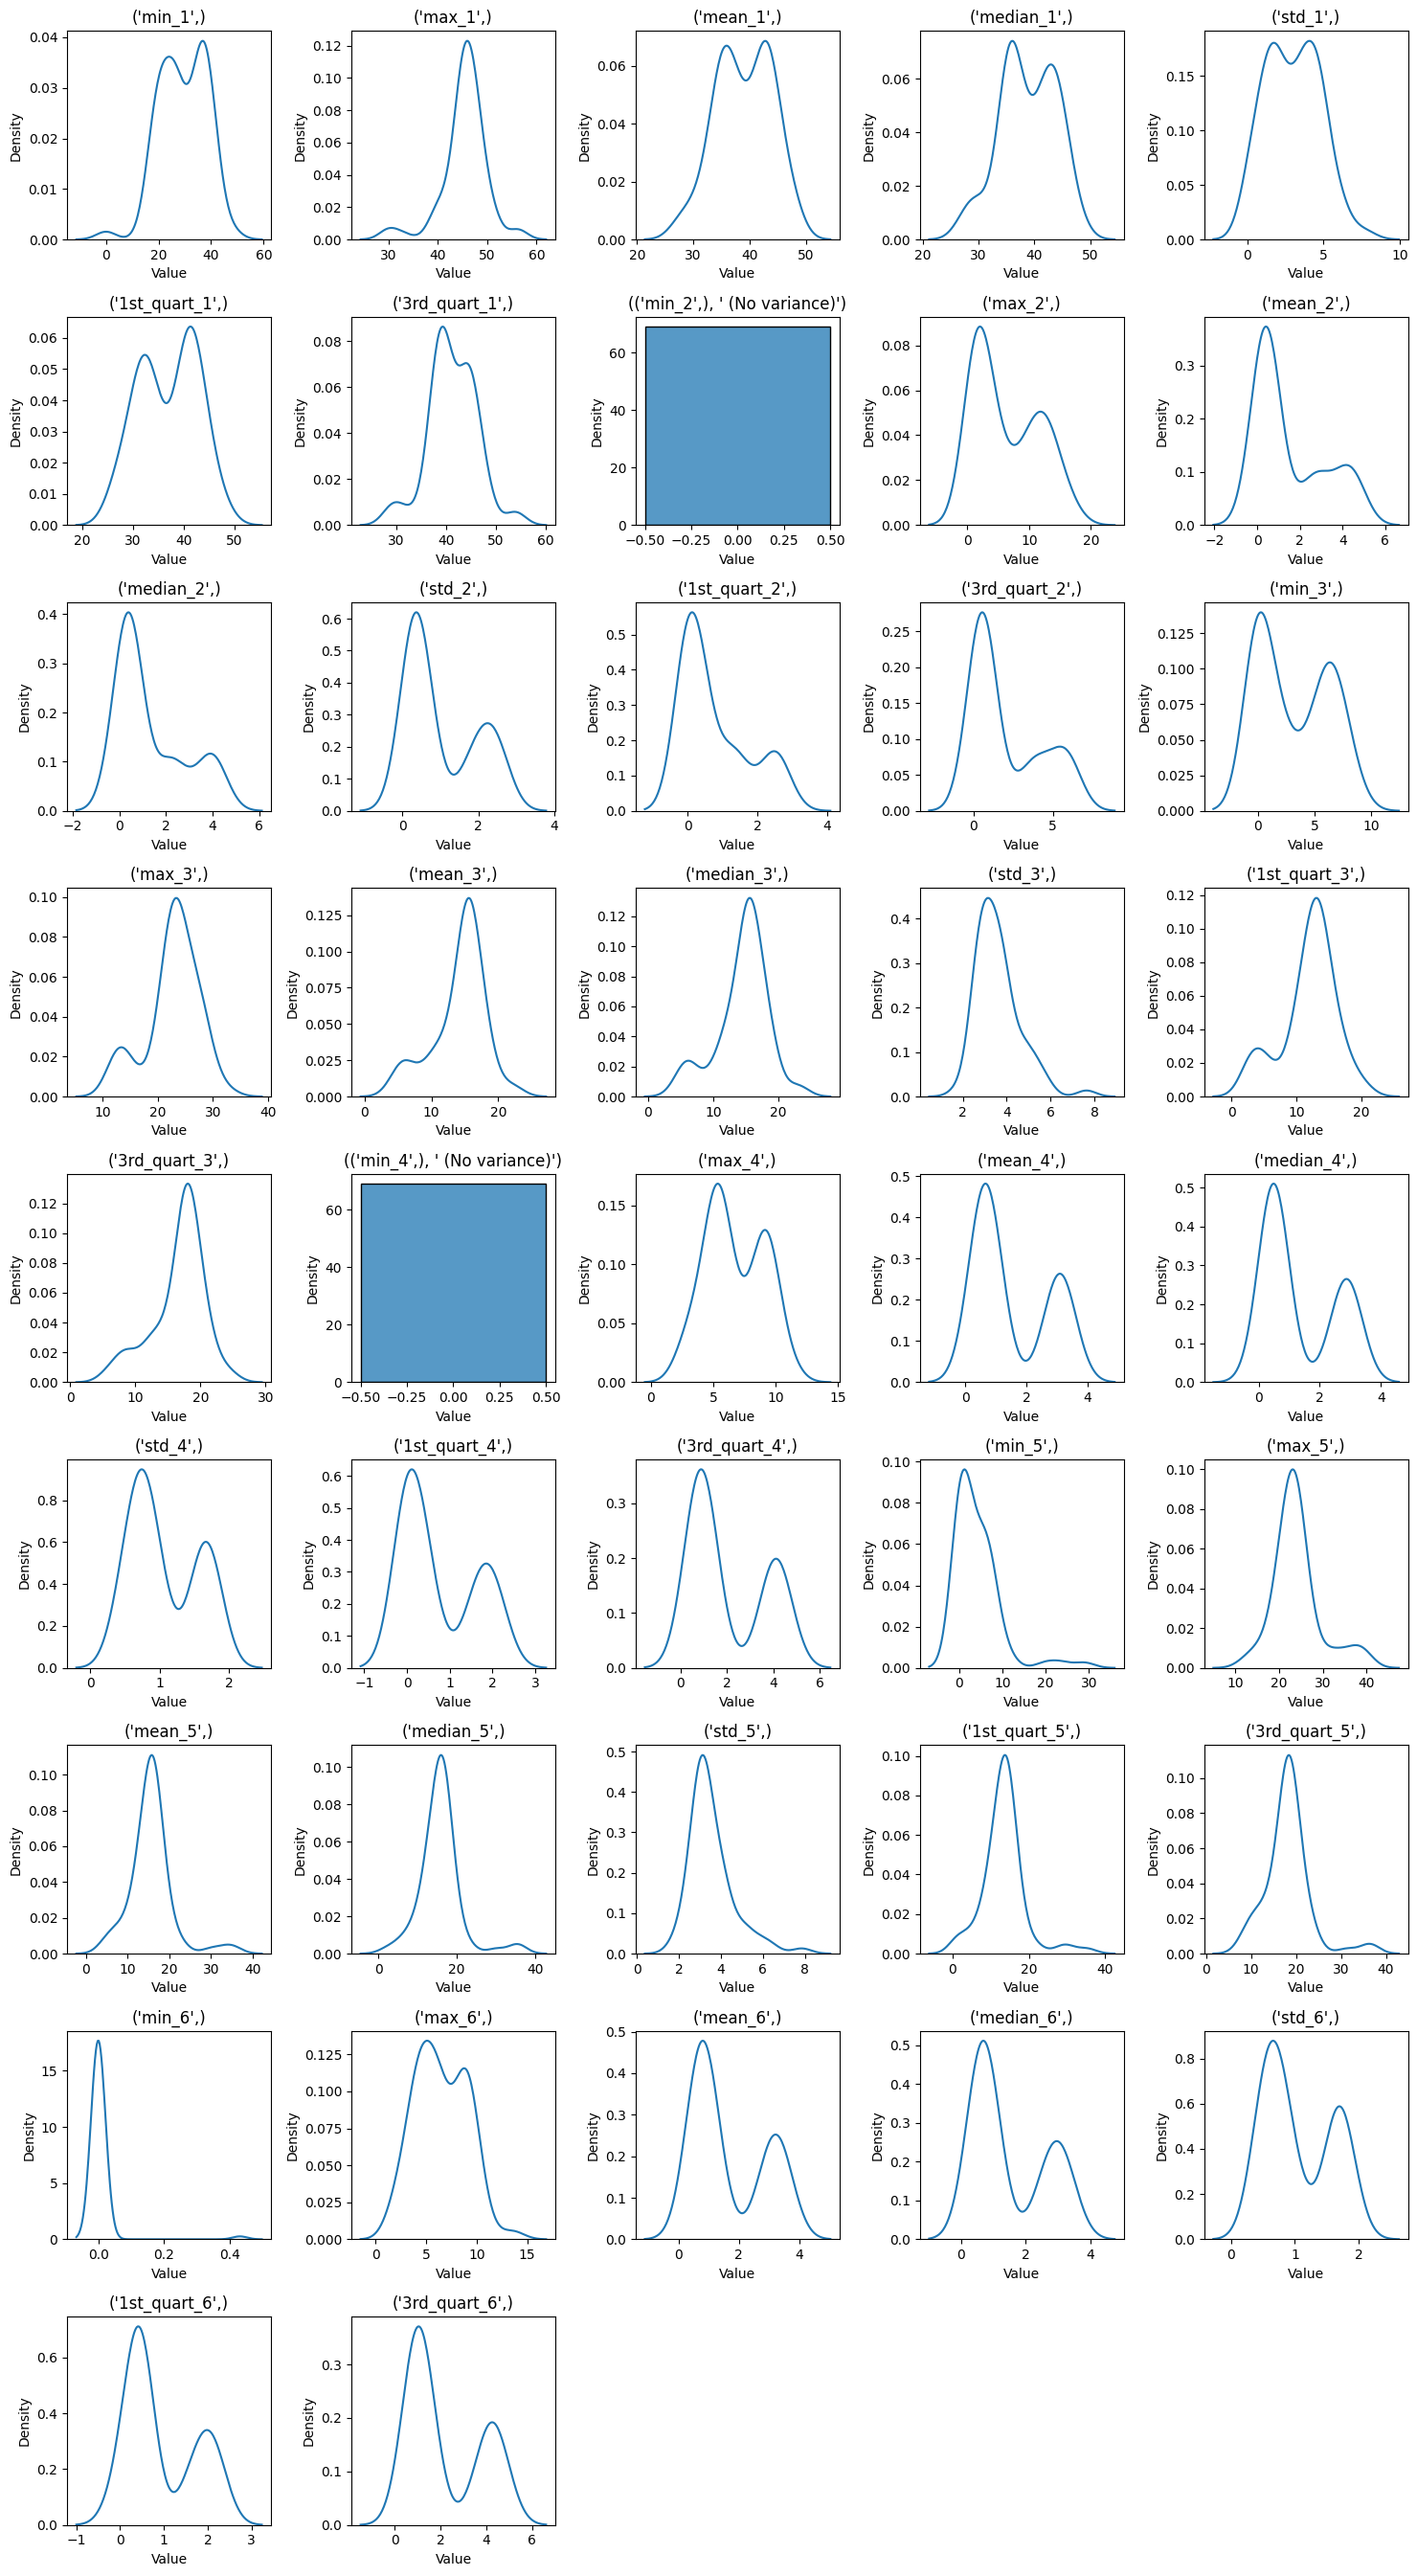

In [449]:
df = train_data  

num_cols = df.shape[1]
num_rows = int(np.ceil(num_cols / 5))
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows*3), squeeze=False)
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    ax = axes[i//5, i%5]
    if df[column].var() == 0:
        sns.histplot(data=df, x=column, ax=ax)
        ax.set_title((column,) + (" (No variance)",))
    else:
        sns.kdeplot(data=df, x=column, ax=ax)
        ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

if num_cols % 5 != 0:
    for j in range(num_cols % 5, 5):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout()
plt.show()


The three features: mean, max and 3rd Quartile have a clean and well-defined boundaries and also data points of these three features are concentrated in a narrow range. A higher density indicates less variability. 

## 2. ISLR 3.7.4

### (a) Linear Train

The calculates RSS for linear regression would be lesser than the RSS for cubic regression since the number of predictors for the cubic regression is more and the model would be trained better than linear regression model. 

### (b) Linear Test

Since the number of predictors in the test data is more, it will lead to over fitting. Therefore, the RSS value for linear regression will be lesser than the cubic regression. 

### (c) Not Linear Train

Linear or not linear, the number of predictors is more in the case of cubic regression and the RSS value would be less for cubic regression than the linear regression. 

### (d) Not Linear Testing

There is no enough information to determine which one has lesser value of RSS. We will have to know the degree of relationship between the variables to determine which regression method is better yeilding a lower RSS value.   

https://stats.stackexchange.com/questions/50807/features-for-time-series-classification<br>https://www.statology.org/bootstrapping-in-python/<br>https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data